# Day 10: Lasso Regression and ElasticNet

In today's session, we will cover Lasso Regression and ElasticNet, two powerful linear regression techniques that extend Ridge Regression by adding more regularization. These methods are designed to handle situations where some features are less important or even irrelevant, improving model performance and interpretability.

## Topics Covered:
- Introduction to Lasso Regression
- Introduction to ElasticNet
- When to use Lasso and ElasticNet
- Comparison: Lasso, Ridge, and ElasticNet
- Regularization and Model Performance

## 1. Lasso Regrssion

Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that performs both variable selection and regularization. It adds a penalty equal to the absolute value of the magnitude of coefficients. As a result, Lasso forces some of the regression coefficients to be exactly zero, which helps in feature selection.

In [2]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
y = np.array([200000, 300000, 400000, 500000, 600000])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Lasso Regression
lasso_model = Lasso(alpha=10)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (Lasso): {mse}")


Mean Squared Error (Lasso): 0.00013061224476111177


## 2. ElasticNet Regression (L1 and L2 Regularization)

ElasticNet is a combination of both Lasso and Ridge regression. It introduces both L1 (absolute) and L2 (squared) penalties. This is useful when dealing with datasets that have high-dimensionality or correlated features.

- $ \lambda_1 $ is the L1 regularization parameter (Lasso).
- $ \lambda_2 $ is the L2 regularization parameter (Ridge).
- $ \beta_i $ are the coefficients of the model.


### Key Characteristics:
- Combines the strengths of both Lasso and Ridge, making it more flexible.
- Useful for feature selection when Lasso alone is too aggressive, and Ridge alone is too lenient.
- Handles correlated features better than Lasso.

In [4]:
from sklearn.linear_model import ElasticNet


# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
y = np.array([200000, 300000, 400000, 500000, 600000])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = elasticnet_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (ElasticNet): {mse}")


Mean Squared Error (ElasticNet): 0.013192139142008464


## 3. When to Use Lasso and ElasticNet

Lasso is best when you suspect that many of your features are irrelevant. It helps with feature selection by shrinking some coefficients to zero.

### ElasticNet is ideal when:
    - You have many highly correlated predictors.
    - Lasso is too aggressive in shrinking coefficients, leading to underfitting.
    - You want a balance between L1 and L2 regularization.


### Choosing Between Lasso and ElasticNet:


- If your features are independent and you want sparse solutions, Lasso is preferred.
- If your features are correlated or if you need flexibility in regularization, ElasticNet works better.

### How to check if features are related or not ?

To check if the features in your dataset are correlated or related, you can calculate the correlation coefficient between the features. The most commonly used method to measure correlation between numerical features is the Pearson correlation coefficient, which ranges from -1 to 1:

- +1: Perfect positive correlation (as one feature increases, the other increases proportionally).
- 0: No correlation (the features are independent).
- -1: Perfect negative correlation (as one feature increases, the other decreases).

### Example: House price prediction model  

In the context of the house price prediction model, we can check for correlation between features like size of the house, number of bedrooms, and age of the house.

Steps to Check Correlation:
- Collect your data (e.g., house features like size, number of bedrooms, and age).
- Calculate the Pearson correlation coefficient for each pair of features.
- Visualize the correlation matrix to understand the relationships between the features.

              House_Size  Num_Bedrooms  Age_of_House  House_Price
House_Size      1.000000      0.960432      0.119865     0.997429
Num_Bedrooms    0.960432      1.000000     -0.136426     0.977157
Age_of_House    0.119865     -0.136426      1.000000     0.059244
House_Price     0.997429      0.977157      0.059244     1.000000


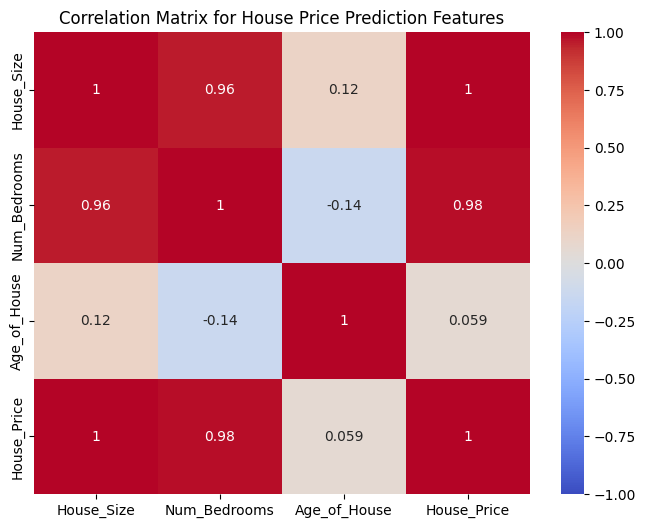

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for house price prediction model
data = {
    'House_Size': [1500, 1800, 2400, 3000, 3500],
    'Num_Bedrooms': [3, 4, 4, 5, 6],
    'Age_of_House': [10, 5, 20, 15, 7],
    'House_Price': [250000, 320000, 400000, 500000, 600000]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for House Price Prediction Features')
plt.show()


- Highly Correlated Features: 
    - House_Size and Num_Bedrooms are highly correlated with each other (0.96). When features are highly correlated, it may cause multicollinearity, making it difficult for the model to assign importance to each feature. In such cases, Ridge Regression or ElasticNet can help regularize the model and mitigate multicollinearity.
- House_Price is Strongly Influenced by House_Size and Num_Bedrooms: Both the house size and number of bedrooms are strongly correlated with the house price. These are good features for a predictive model.
- Age_of_House is Not Correlated: 
    The age of the house does not have a significant relationship with other features or the house price in this dataset.
This correlation matrix gives insights into which features are most impactful and which may not contribute much to the model.

## 4. Comparison: Lasso, Ridge, and ElasticNet


- Model : Lasso 
    - Penalty
        - L1 (absolute)
    - Key Use
        - Feature selection, sparse models

- Model : Ridge	
    - Penalty
        - L2 (squared)
    - Key use
        - Handles multicollinearity, prevents overfitting

- Model : ElasticNet
    - Penalty
        - L1 + L2 (combined)
    - Key use
        - Feature selection + multicollinearity handling	

### Choosing the Right Model:
- Lasso is preferred when feature selection is important, and you expect some features to be irrelevant.
- Ridge is better when all features are useful, but you want to regularize and reduce overfitting.
- ElasticNet is a balance between both approaches and is useful when dealing with high-dimensional data or correlated features.

## 5. Regularization and Model Performance

Regularization techniques like Ridge and Lasso help prevent overfitting by penalizing large coefficients. They are especially useful when the dataset has more features than observations or when multicollinearity is an issue.

### Detecting Overfitting:

- Overfitting occurs when a model performs well on training data but poorly on unseen test data.
- Train MSE < Test MSE: A significant gap between training and test MSE is a sign of overfitting.

### Regularization to Prevent Overfitting:

- Ridge and ElasticNet introduce penalties that reduce the flexibility of the model, improving its generalization ability.

## Conclusion

To conclude Day 10 on Lasso Regression and ElasticNet, we explored the following key concepts:

### Day 10: Lasso Regression and ElasticNet
- Lasso Regression (L1 Regularization):
    - Lasso applies an L1 penalty, which encourages sparsity in the model by reducing some coefficients to zero.
    - This makes Lasso useful for feature selection, as it retains only the most relevant features.
    - Example: If we have many features and want to select the most important ones, Lasso can automatically exclude irrelevant features by shrinking their coefficients to zero.
- ElasticNet:
    - ElasticNet combines both L1 (Lasso) and L2 (Ridge) penalties, balancing between feature selection and handling multicollinearity.
    - It is especially useful when there are correlated features, and neither Lasso nor Ridge alone is sufficient.
    - Example: When dealing with a dataset where features are highly correlated, ElasticNet helps to select important features while preventing overfitting.

- Model Evaluation:
    - We evaluated Lasso and ElasticNet models using Mean Squared Error (MSE) and observed how they performed on datasets, especially with correlated features.

    - Key Takeaways:
        - Lasso is ideal for models where you want feature selection and sparse solutions, as it shrinks coefficients of less important features to zero.
        - ElasticNet is preferred when you have correlated features and need both feature selection and regularization.
        - Model Performance: Regularization helps improve model performance by preventing overfitting and improving generalization to unseen data.

## What's Next:

Tomorrow, on Day 11, we will delve into advanced model tuning techniques. Specifically, we will focus on:

-   Regularization Techniques: 
    - Expanding our understanding of regularization methods beyond Lasso, Ridge, and ElasticNet, and how to fine-tune the regularization strength for better model performance.
- Model Tuning and Hyperparameter Optimization: 
    - We will explore grid search and random search for selecting optimal hyperparameters, including the regularization strength (alpha) for Ridge, Lasso, and ElasticNet models.
- Cross-Validation: 
    - Learning how to use cross-validation to evaluate model performance and prevent overfitting during the training process.

This will help us in improving model generalization and performance while ensuring robust predictions on unseen data. Looking forward to diving deeper into these critical topics!